In [206]:
%matplotlib inline

In [207]:
import os
import obspy
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.basemap import Basemap
import shapefile

## Eventos para cada estação

In [208]:
STA = ['BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

In [209]:
z = 3

In [210]:
directory = '/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/event_data/'+STA[z]

In [211]:
EQR_files = []
EQR_files_S = []

for root, dirs, files in os.walk(directory):
    for rffiles in files:
            if rffiles.endswith('a=2.5.eqr'):
                EQR_files.append(os.path.join(root, rffiles))
EQR_files_S = sorted(EQR_files)

In [212]:
EQR = []

for i in EQR_files_S:
    EQR.append(obspy.read(i,headonly=True))

In [213]:
stla = []
stlo = []
evla = []
evlo = []
for i in EQR:
    stla.append(i[0].stats.sac.stla)
    stlo.append(i[0].stats.sac.stlo)
    evla.append(i[0].stats.sac.evla)
    evlo.append(i[0].stats.sac.evlo)

In [214]:
stla_s = []
stlo_s = []
evla_s = []
evlo_s = []
for i in EQR:
    if 30 <=  i[0].stats.sac.gcarc <= 90:
        stla_s.append(i[0].stats.sac.stla)
        stlo_s.append(i[0].stats.sac.stlo)
        evla_s.append(i[0].stats.sac.evla)
        evlo_s.append(i[0].stats.sac.evlo)

## Eventos selecinados visualmente para cada estação

In [215]:
Gaussian_filter_zhu = ['gcarc_30_0.5','gcarc_30_1.0','gcarc_30_2.5']
Gaussian_filter_legend = ['0_5','1_0','2_5']

In [216]:
t = 2

In [217]:
directory_zhu = '/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'+Gaussian_filter_zhu[t]+'/'+STA[z]

In [218]:
EQR_files_zhu = []
EQR_files_zhu_S = []

for root, dirs, files in os.walk(directory_zhu):
    for rffiles in files:
            if rffiles.endswith('.eqr'):
                EQR_files_zhu.append(os.path.join(root, rffiles))
EQR_files_zhu_S = sorted(EQR_files_zhu)

In [219]:
EQR_zhu = []

for i in EQR_files_zhu_S:
    EQR_zhu.append(obspy.read(i,headonly=True))

In [220]:
stla_zhu = []
stlo_zhu = []
evla_zhu = []
evlo_zhu = []
for i in EQR_zhu:
    stla_zhu.append(i[0].stats.sac.stla)
    stlo_zhu.append(i[0].stats.sac.stlo)
    evla_zhu.append(i[0].stats.sac.evla)
    evlo_zhu.append(i[0].stats.sac.evlo)

Text(0.5,1,'Event Selected - Station GRJU')

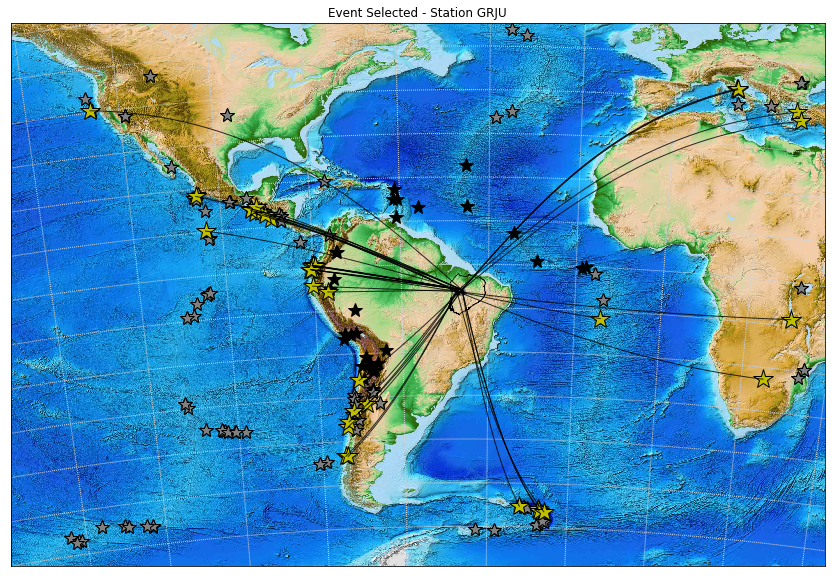

In [221]:
fig=plt.figure(figsize=(20,10))


project_Lat = -5
project_Lon = -45

m = Basemap(resolution='l',projection='eqdc',lat_0=project_Lat, lon_0=project_Lon,llcrnrlon=-160.,
            llcrnrlat=-60.,urcrnrlon=30.,urcrnrlat=60.)

m.drawmeridians(np.arange(0, 360, 20),color='lightgrey')
m.drawparallels(np.arange(-90, 90, 10),color='lightgrey')
sf = shapefile.Reader('/home/diogo/dados_doutorado/parnaiba_basin/SIG_dados/shapes/bacia_parnaiba/bacia_parnaiba.shp')
for shape in sf.shapes():
    # adding polygon(s)
    parts = list(shape.parts) + [len(shape.points)]
    partlims = zip(parts[:-1], parts[1:])
    for i1, i2 in partlims:
        points = shape.points[i1:i2]
        lon, lat = zip(*points)
        x,y = m(lon, lat)
        m.plot(x, y, '-', lw=0.75, color='k')

for lon, lat in zip(stlo,stla):
    x,y = m(lon, lat)
    msize = 8
    m.plot(x, y, '^',markersize=msize,markeredgecolor='grey',markerfacecolor='k')
        
x,y = m(evlo,evla)
msize = 15
m.plot(x, y, '*',markersize=msize,markeredgecolor='k',markerfacecolor='k')

x,y = m(evlo_s,evla_s)
msize = 15
m.plot(x, y, '*',markersize=msize,markeredgecolor='k',markerfacecolor='grey')

x,y = m(evlo_zhu,evla_zhu)
msize = 20
m.plot(x, y, '*',markersize=msize,markeredgecolor='k',markerfacecolor='y')

for evlon_0, evlat_0, evlon_c,evlat_c in zip(stlo_zhu,stla_zhu,evlo_zhu,evla_zhu):
    m.drawgreatcircle(evlon_0, evlat_0, evlon_c,evlat_c,linewidth=1,color='k',alpha=0.8)
    


sf = shapefile.Reader('/home/diogo/dados_doutorado/parnaiba_basin/SIG_dados/shapes/bacia_parnaiba/bacia_parnaiba.shp')
for shape in sf.shapes():
    # adding polygon(s)
    parts = list(shape.parts) + [len(shape.points)]
    partlims = zip(parts[:-1], parts[1:])
    for i1, i2 in partlims:
        points = shape.points[i1:i2]
        x, y = zip(*points)
        m.plot(x, y, '-', lw=3, color='k')
m.etopo()

plt.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/azimute_codes/'+STA[z]+'/'+'selected_events_'+STA[z]+'_'+Gaussian_filter_legend[t]+'.pdf')
plt.title('Event Selected - Station '+STA[z])